In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Telco-Customer-Churn.csv')

data.head()

Mounted at /content/gdrive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df = data.drop('customerID', axis=1)

In [22]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Simply drop the 11 entries as there are total of 7k rows.

In [24]:
df.dropna(inplace = True)

In [25]:
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [26]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


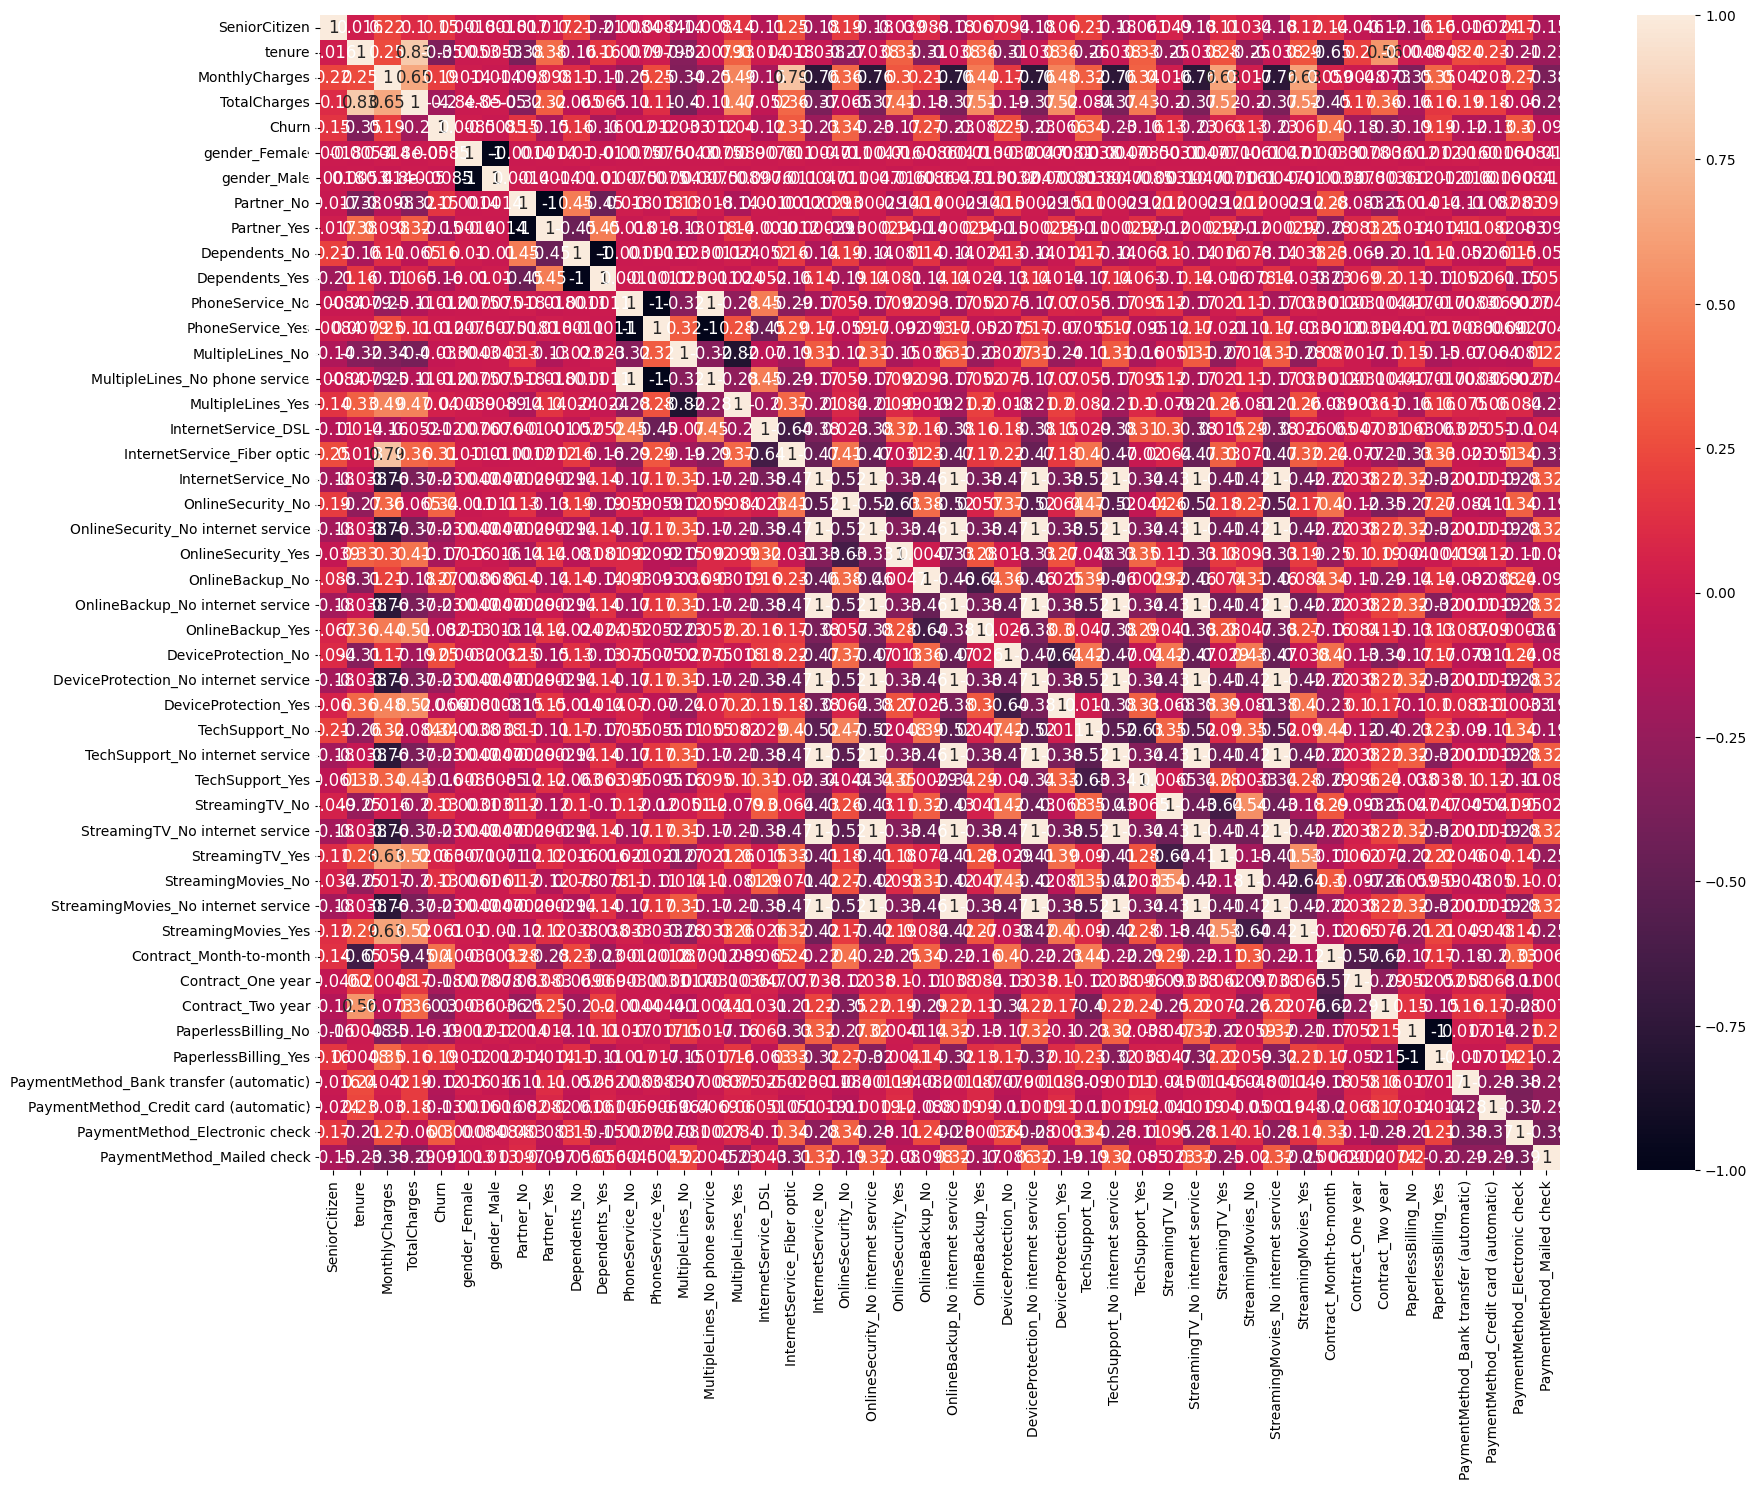

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

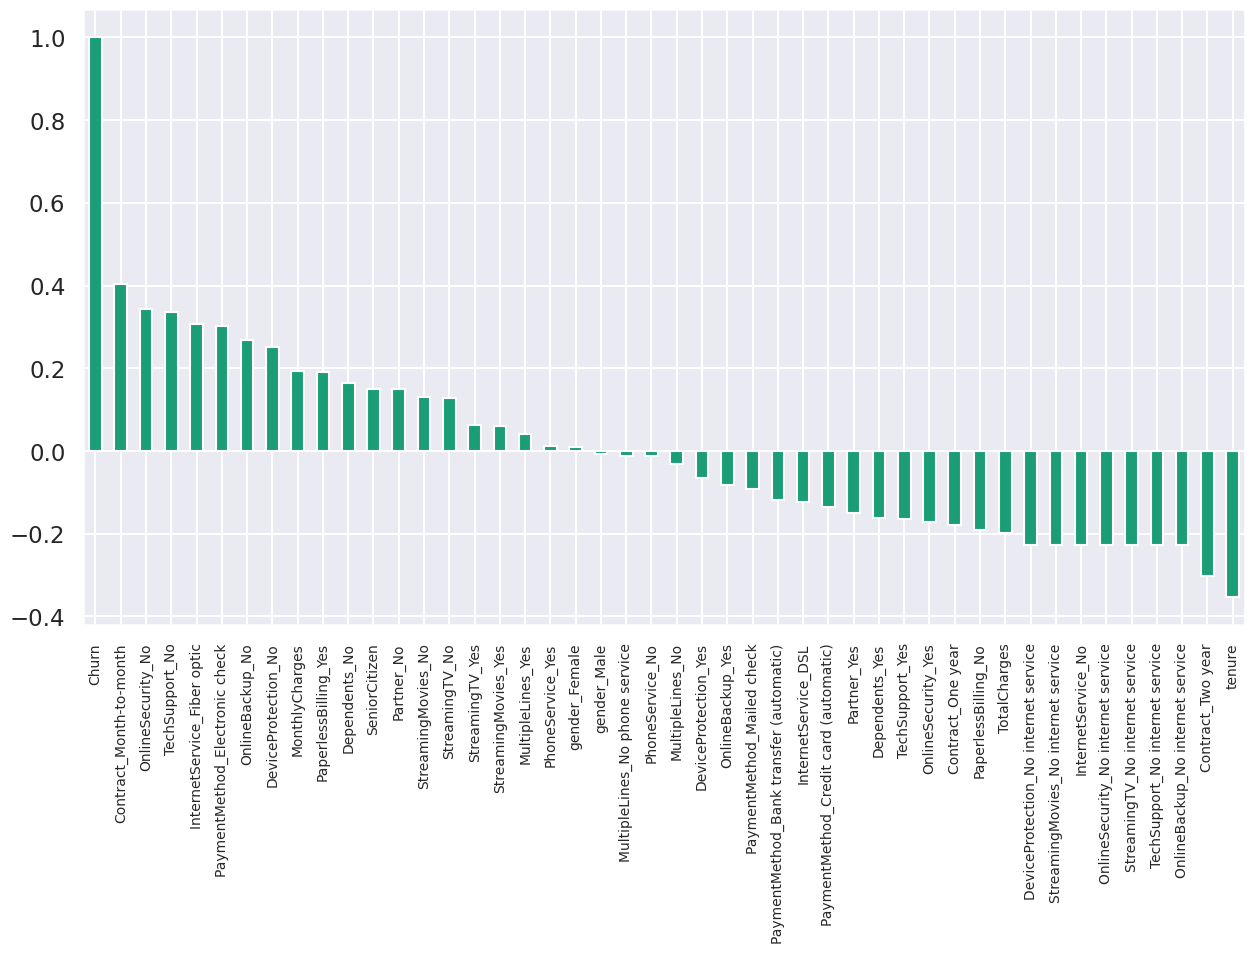

In [ ]:
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(fontsize=10);

It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No, etc. are negatively correlated with Churn.

Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport, etc. with InternetService_No seem to be negatively related to Churn.

## **Datamining to check prediction variable and it's interaction with other variables**

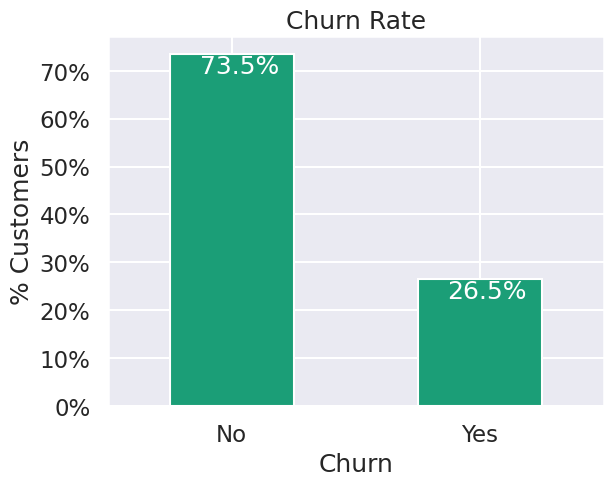

In [ ]:
import matplotlib.ticker as mtick

ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

<Axes: xlabel='Churn', ylabel='tenure'>

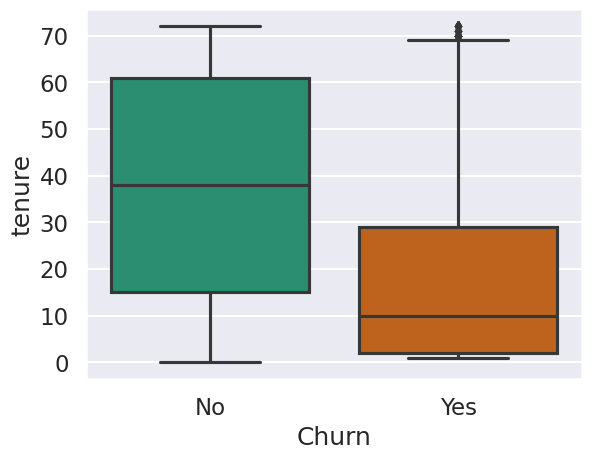

In [ ]:
sns.boxplot(x = data.Churn, y = data.tenure)

From above plot, it can be clearly seen that, the customers who do not churn tend to stay for a longer tenure with the telecom company.

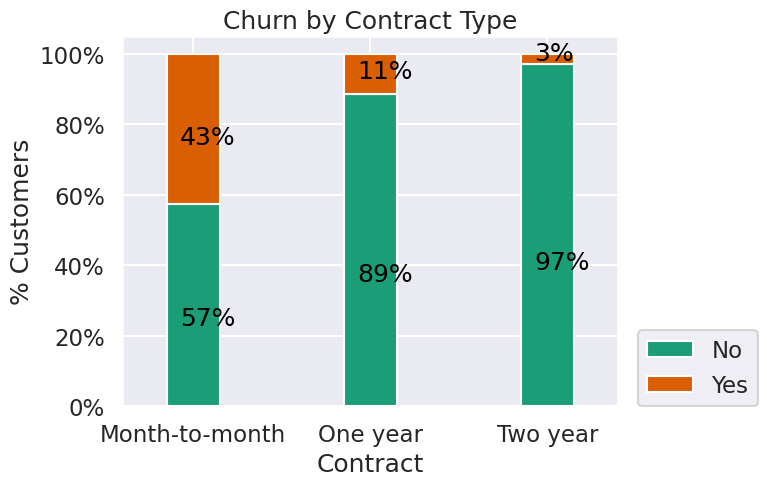

In [ ]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0) 
                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')
plt.legend(loc=(1.04, 0))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'black')

The customers who have a month to month contract have a very high churn rate

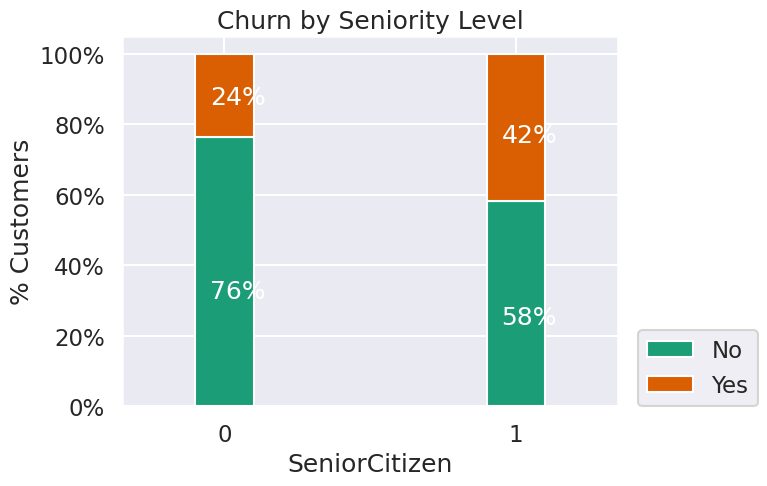

In [ ]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')
plt.legend(loc=(1.04, 0))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')      

From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

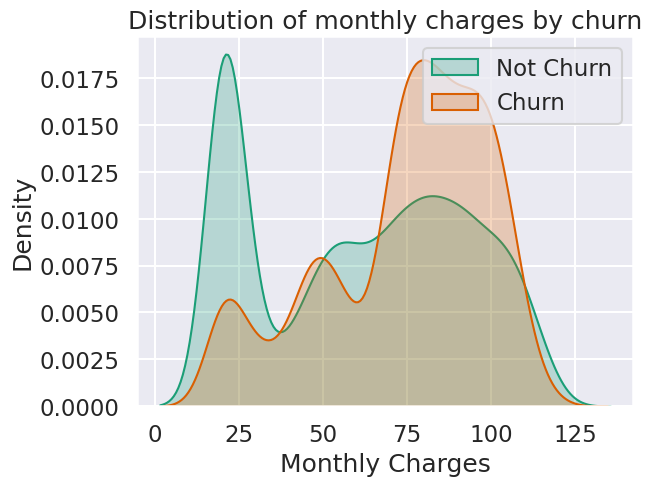

In [ ]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], fill=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, fill= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# **Predictive modelling**

To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in Logistic Regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, Total Charges will be removed.

In [10]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [27]:
drop_col = ['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No',
            'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_No', 'PaymentMethod_Mailed check',
            'TotalCharges']

df_dummies = df_dummies.drop(drop_col, axis=1)

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


# **Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test

print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8024164889836531
Precision: 0.6678321678321678
Recall: 0.5106951871657754


Confusion matrix
[[938  95]
 [183 191]]


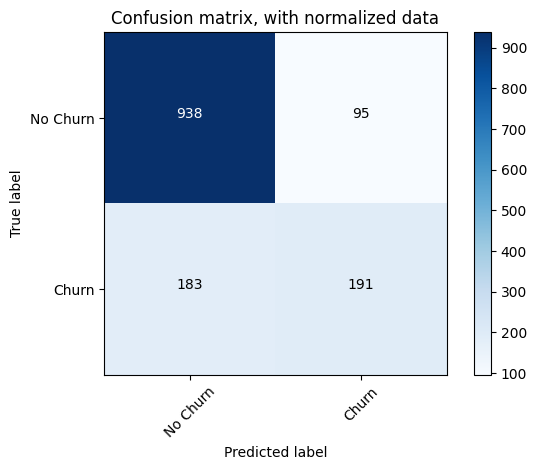

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered.
However, the precision (0.66%) and recall (0.51%) for predictions in the positive class (churn) are relatively low, which suggests the data set may be imbalanced.


The end goal for the project is to know every single customer who will churn and how much insight can be generated. Target is to focus on to keep the cutomers and how much company could spend to keep them before having them as a customer turned into a loss. So considering the final goal is to reduce churn and take the right preventing actions in time, need to check which independent variables have the most influence on the predicted outcome. Therefore we review the weights of each variable.

In [32]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic                0.602914
PaperlessBilling_Yes                       0.308887
PaymentMethod_Electronic check             0.295902
StreamingMovies_Yes                        0.283432
StreamingTV_Yes                            0.282760
MultipleLines_No phone service             0.253196
MultipleLines_Yes                          0.222462
SeniorCitizen                              0.188842
gender_Female                              0.029510
PaymentMethod_Bank transfer (automatic)    0.012515
DeviceProtection_Yes                       0.009136
MonthlyCharges                            -0.012422
Partner_Yes                               -0.021428
PaymentMethod_Credit card (automatic)     -0.111154
OnlineBackup_Yes                          -0.129709
OnlineSecurity_No internet service        -0.191046
DeviceProtection_No internet service      -0.191046
TechSupport_No internet service           -0.191046
StreamingTV_No internet service           -0.191046
StreamingMov

It can be observed that some variables have a positive relation to our predicted variable (Churn) and some have a negative relation.
- “InternetService_Fiber optic”: The positive relation to churn means that having this Internet Service also increases the 
   probability of a customer to churn. 
- “Contract_Two year” is in a highly negative relation to the predicted variable, which means that customers with this type 
   of contract are very unlikely to churn. 

In [33]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


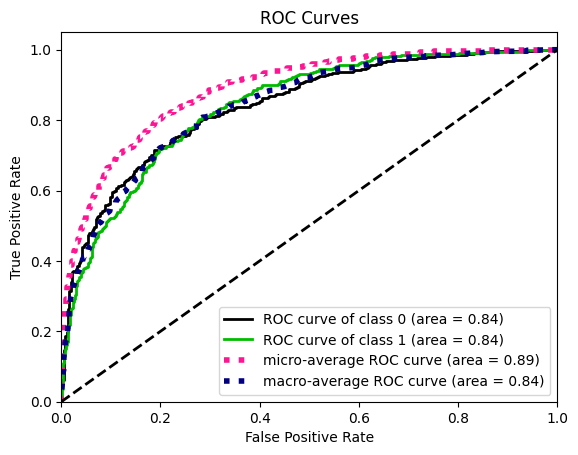

In [34]:
from scikitplot.metrics import plot_roc_curve

y_pred_proba = model.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_proba)
plt.legend(fontsize=10);

AUC is 0.84 means there is 84% chance that model will be able to distinguish between Churn and NoChurn.

In [35]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

The class for churn is only around 30% of the total population of samples. There is a real risk that the model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, need to randomly duplicate observations from the minority class.

In [36]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority, replace=True, n_samples=5163, random_state=1) 

data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [37]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train.drop(columns=['Churn'])
test_x_upsampled = test.drop(columns=['Churn'])
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(train_x_upsampled, train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

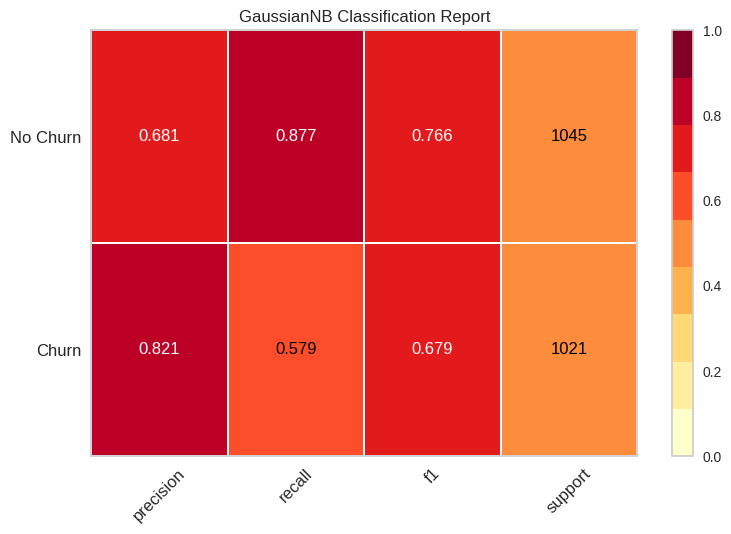

In [38]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

classes=['Churn','No Churn']

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled) 
visualizer.score(test_x_upsampled, test_y_upsampled)  
g = visualizer.poof()       

**From above output it can be see that, the overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved.**

In [39]:
from sklearn.metrics import roc_auc_score
 
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)

test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.840742140383391
Balanced model AUROC: 0.7348869904259356


AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.

**Survival Analysis**

Logistic Regression is assigning a probability to each observation that describes how likely it is to belong to the positive class.

In any large enough group of customers like Telecom there are going to be people who have the same attributes / features. Some of those will churn and some of them won’t, and what Telecom company ideally like to know is the probability of churn for each group. This is what Logistic Regression provides. But it is not clear what time scale it is predicting for. Therefore, survival analysis was conducted for this purpose.

**Kapalan-Meier and Cox Proportional Hazards Model**

Kapalan is fully parametric and the Cox PH Model is semi-parametric.
Kaplan-Meier need specification of the distribution of the underlying hazard. CoxPH analyses the covariates (features) of a dataset with regards to how long a customer survives. It describes how each feature proportionally increases risk over the baseline survival rate for a cohort.

For each customer, two important data points for survival analysis are required
‘Tenure’: how long they have been a customer when the data is observed and ‘Churn’: whether or not the customer left when the data was observed

In [ ]:
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [7]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=f7403b958f69176ed25f104ca8a66e54ef8689a2b83153891a81ee5e76507f28
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import lifelines
from lifelines import KaplanMeierFitter

kmf = lifelines.KaplanMeierFitter()
kmf.fit(data['tenure'], data['Churn'], label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

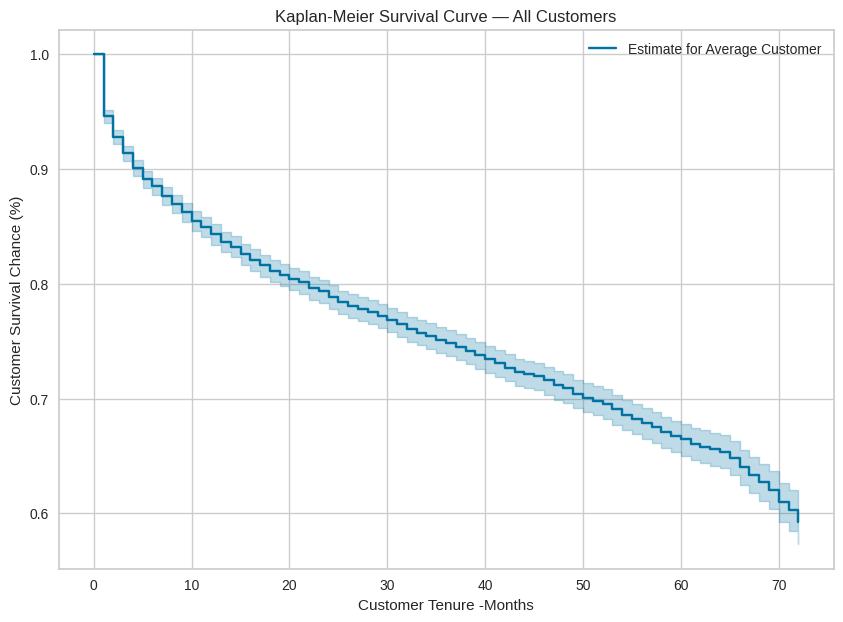

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

From the plot, within 1-2 years, company retained almost 80-90% of their customers. But there is steady decline and after over 70 months, the company is able to retain almost 60% of their customers. 

To examine the effects of different variables, the Cox Proportional Hazards Model is used.

## **Applying Cox Proportional Hazard Model**

In [2]:
data1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Telco-Customer-Churn.csv')
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
dummies = pd.get_dummies(data1[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
data1 = dummies.join(data1[['MonthlyCharges', 'TotalCharges']])

In [4]:
data1['TotalCharges'] = data1[['TotalCharges']].replace([' '], '0')
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'])

In [5]:
data1 = data1[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

data1.head()

,SeniorCitizen,tenure,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,Churn_Yes
0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,29.85,29.85,0
1,0,34,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,56.95,1889.50,0
2,0,2,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,53.85,108.15,1
3,0,45,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,42.30,1840.75,0
4,0,2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,70.70,151.65,1


In [10]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(data1, test_size=0.2)

cph = CoxPHFitter()
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)
cph.print_summary(model="telecom churn prediction variables", decimals=3)

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4142 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1492
   partial log-likelihood = -9791.916
         time fit was run = 2023-05-08 01:37:29 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.053      1.055      0.055           -0.055            0.161                0.947                1.175
gender_Female                            0.056      1.058      0.046           -0.035            0.147                0.966                1.158
Partner_Yes                             -0.179      0.836      0.054           -0.285           -0.074                0.752                0.928
Dependents_Yes                          -0.079      0.924      0.072           -0.220            0.062                0.803                1.064
PhoneService_Yes                         0.887      2.427      0.478           -0.051            1.824                0.950                6.197
MultipleLines_Yes                        0.095      1.100      0.124           -0.148            0.338                0.863                1.402
InternetService_DSL                      2.320     10.179      0.635            1.076            3.565                2.932               35.335
InternetService_Fiber optic              3.368     29.016      1.177            1.061            5.675                2.889              291.389
OnlineSecurity_Yes                      -0.215      0.806      0.134           -0.477            0.047                0.621                1.048
OnlineBackup_Yes                        -0.093      0.912      0.125           -0.338            0.153                0.713                1.165
DeviceProtection_Yes                     0.119      1.126      0.126           -0.128            0.366                0.879                1.442
TechSupport_Yes                         -0.057      0.945      0.133           -0.317            0.204                0.728                1.227
StreamingTV_Yes                          0.290      1.336      0.233           -0.167            0.746                0.846                2.109
StreamingMovies_Yes                      0.276      1.318      0.232           -0.179            0.732                0.836                2.079
Contract_One year                       -1.340      0.262      0.138           -1.611           -1.069                0.200                0.343
Contract_Two year                       -3.781      0.023      0.317           -4.402           -3.161                0.012                0.042
PaperlessBilling_Yes                     0.118      1.125      0.060            0.001            0.235                1.001                1.265
PaymentMethod_Bank transfer (automatic) -0.451      0.637      0.092           -0.632           -0.270                0.531                0.763
PaymentMethod_Credit card (automatic)   -0.496      0.609      0.095           -0.682           -0.309                0.506                0.734
PaymentMethod_Electronic check          -0.068      0.934      0.074           -0.213            0.077                0.808                1.080
MonthlyCharges                           0.011      1.011      0.023           -0.034            0.056                0.967                1.057
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.001                0.998                0.999

                                          cmp to      

The summary statistics above indicates the significance of the covariates in predicting the churn risk.

1. Customers whose PaymentMethod_Electronic check are more likely to churn; likewise, paperless billing customers are more likely to cancel their service (1.13 times). Below plot displays a clear image of expected churn placed in order from high to low risk.
2. Internet service (DSL & Fiber), contract ( 1& 2 years), payment method and total charges play significant role in predicting the churn, whereas all the other covariates are not significant.
3. Interesting point to note here is that , the β (coef ) values in case of covariates TotalCharges is zero (~-0.00), but still the TotalCharges plays a significant role in predicting churn. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.02), it becomes significant.
4. We can see the number of observations listed as n=5634, number of events (churned customers)=1482 coefficients of the model are very important and they tell us how each feature increases risk. The positive number that attribute makes a customer more likely to churn, and negative means customers are less likely to churn.
5. We get the concordance (0.93). This is an assessment of how internally consistent the model is. Concordance of 0.93 suggests a good model. The concordance score evaluates the relative rankings of subject's event times i.e. we can multiple by a positive constant, or add a constant, and the rankings won't change). A model maximized for concordance- index will give good predicted rankings.

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

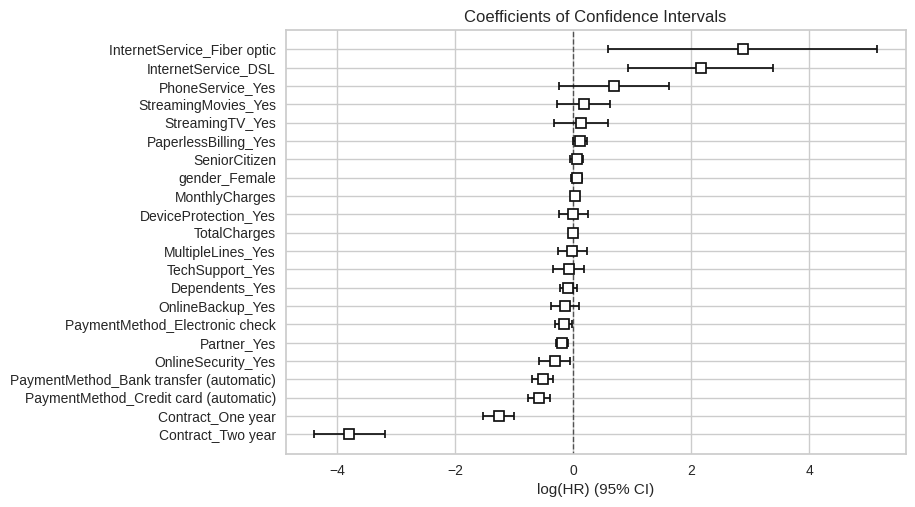

In [ ]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

## **Churn Prediction**

Some usable information are available now to make decisions about how to reduce and prevent churn. Now focusing on predictive analytics, selecting only the remaining customers from the dataset as not much can be done for the customers who have already left.

Assuming T = event time for some Churn to happen, and S(t): = P(T > t) is the survival function.

We are interested to know What is the new survival function, given we know the customer was earlier in the list past time s.

P(T > t|T > s) = S(t) / S(s)


In [11]:
censored_subjects = data1.loc[data1['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[data1.loc[c.name, 'tenure']]).clip(upper=1))

Applied ‘unconditioned’ survival functions because some of these curves will predict churn before the customer’s current tenure time.

Text(0.5, 1.0, 'Survival Curve')

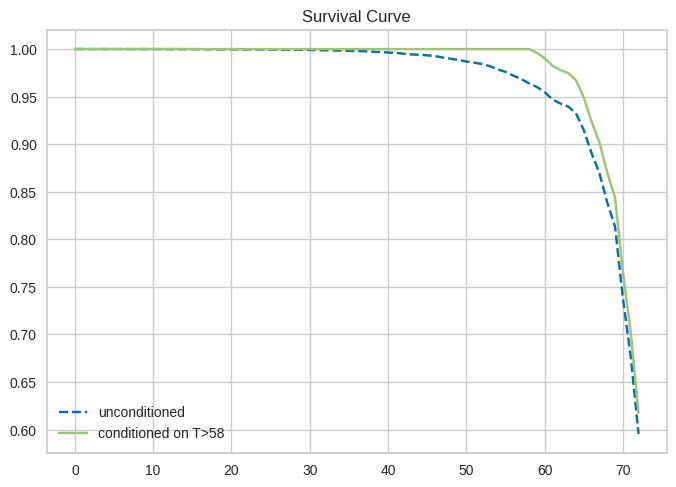

In [ ]:
customer = 12
unconditioned_sf[customer].plot(ls="--", label="unconditioned")
conditioned_sf[customer].plot(label="conditioned on T>58")
plt.legend()
plt.title('Survival Curve')

The above plot shows that, customer 12 is still a customer after 58 months means his survival curve drops slower than the baseline for the customers similar but without that condition. There is around a 50% chance that a customer longer than 70 months (almost 6 years) will churn. If the customers are churning much earlier/later than the business perceives them to be, then the business may have to tweak the customer life-cycle management.

Using the median to get a single row that has the number of months (tenure) where the customers have 50% likelihood of churning.

In [12]:
from lifelines.utils import median_survival_times

predictions_50 = median_survival_times(conditioned_sf)

In [ ]:
predictions_50.T.join(data1[['MonthlyCharges','tenure']])

,0.5,MonthlyCharges,tenure
0,24.0,29.85,1
1,48.0,56.95,34
3,60.0,42.30,45
6,31.0,89.10,22
7,28.0,29.75,10
...,...,...,...
7037,inf,21.15,72
7038,42.0,84.80,24
7039,inf,103.20,72
7040,31.0,29.60,11


In [ ]:
values = predictions_50.T.join(data1[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

values.head()

,0.5,MonthlyCharges,tenure,RemainingValue
0,24.0,29.85,1,686.55
1,48.0,56.95,34,797.30
3,60.0,42.30,45,634.50
6,31.0,89.10,22,801.90
7,28.0,29.75,10,535.50


It can be seen here that, by multiplying the MonthlyCharges by the difference between the customer’s current tenure and their median cancellation date, a visbility is available for which customers would inflict the most damage to the top line.

# **Churn Prevention**

A list of customers can be prepared now, who are the highest risk for churn. The goal would be to retain them.

Reviewing the coefficient chart again, the most significant features which impact survival positively are identified-

    - 2 year contract
    - 1 year contract
    - Credit Card payment
    - bank Transfer payment

Beyond these four the increases in survival become minimal and the results aren’t significant anyway. Stakeholders need to understand how much they can spend to keep customers and compare their survival rates with customer similar to them who instead have each of these four features present.

In [ ]:
upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Contract_One year', 'Contract_Two year']

results_dict = {}

for customer in values.index:

    actual = data1.loc[[customer]]
    change = data1.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]

    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0


results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

actions.head()

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
0,29.85,1,686.55,23.0,29.0,28.0,33.0,54.0
1,56.95,34,797.30,47.0,51.0,50.0,37.0,71.0
3,42.30,45,634.50,59.0,64.0,55.0,49.0,inf
6,89.10,22,801.90,27.0,22.0,31.0,37.0,56.0
7,29.75,10,535.50,26.0,31.0,31.0,37.0,56.0


In [ ]:
actions['CreditCard Diff'] = (actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['BankTransfer Diff'] = (actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['1yrContract Diff'] = (actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']
actions['2yrContract Diff'] = (actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

actions.head()

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
0,29.85,1,686.55,23.0,29.0,28.0,33.0,54.0,179.10,149.25,298.50,925.35
1,56.95,34,797.30,47.0,51.0,50.0,37.0,71.0,227.80,170.85,-569.50,1366.80
3,42.30,45,634.50,59.0,64.0,55.0,49.0,inf,211.50,-169.20,-423.00,inf
6,89.10,22,801.90,27.0,22.0,31.0,37.0,56.0,-445.50,356.40,891.00,2583.90
7,29.75,10,535.50,26.0,31.0,31.0,37.0,56.0,148.75,148.75,327.25,892.50


Here, moving the customer in the first row to paying by Credit Card could be worth up to dollar 179.10.